## Chunking Strategies in RAG: Optimising Data for Advanced AI Responses

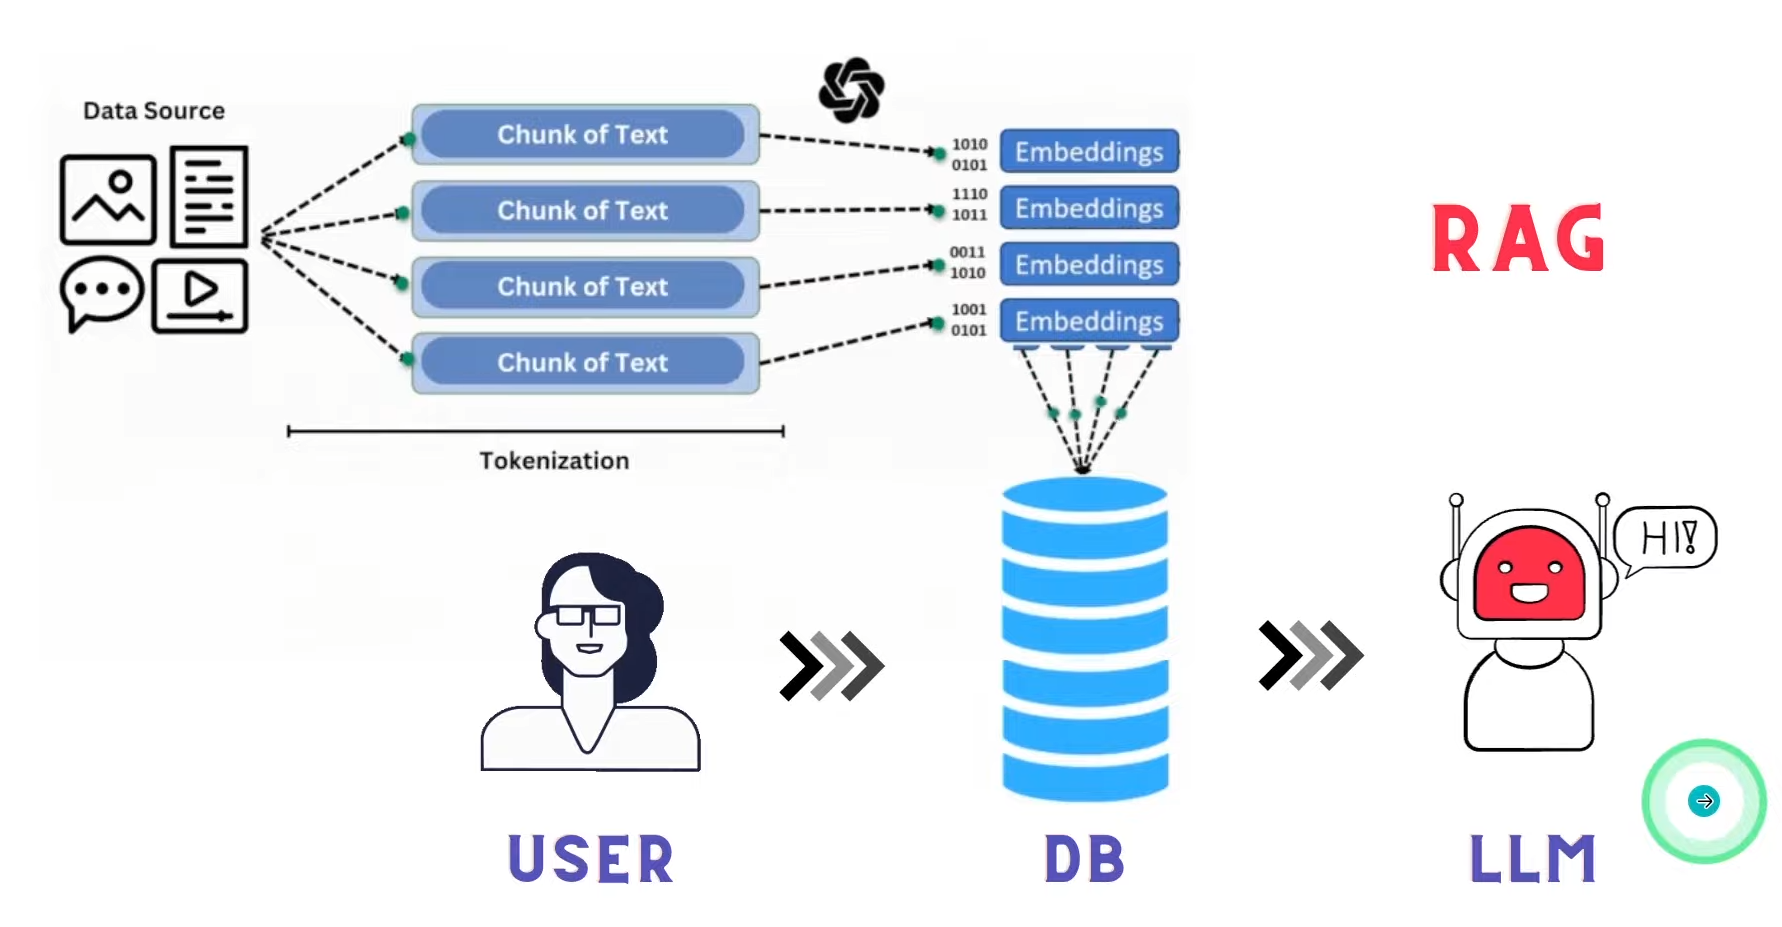

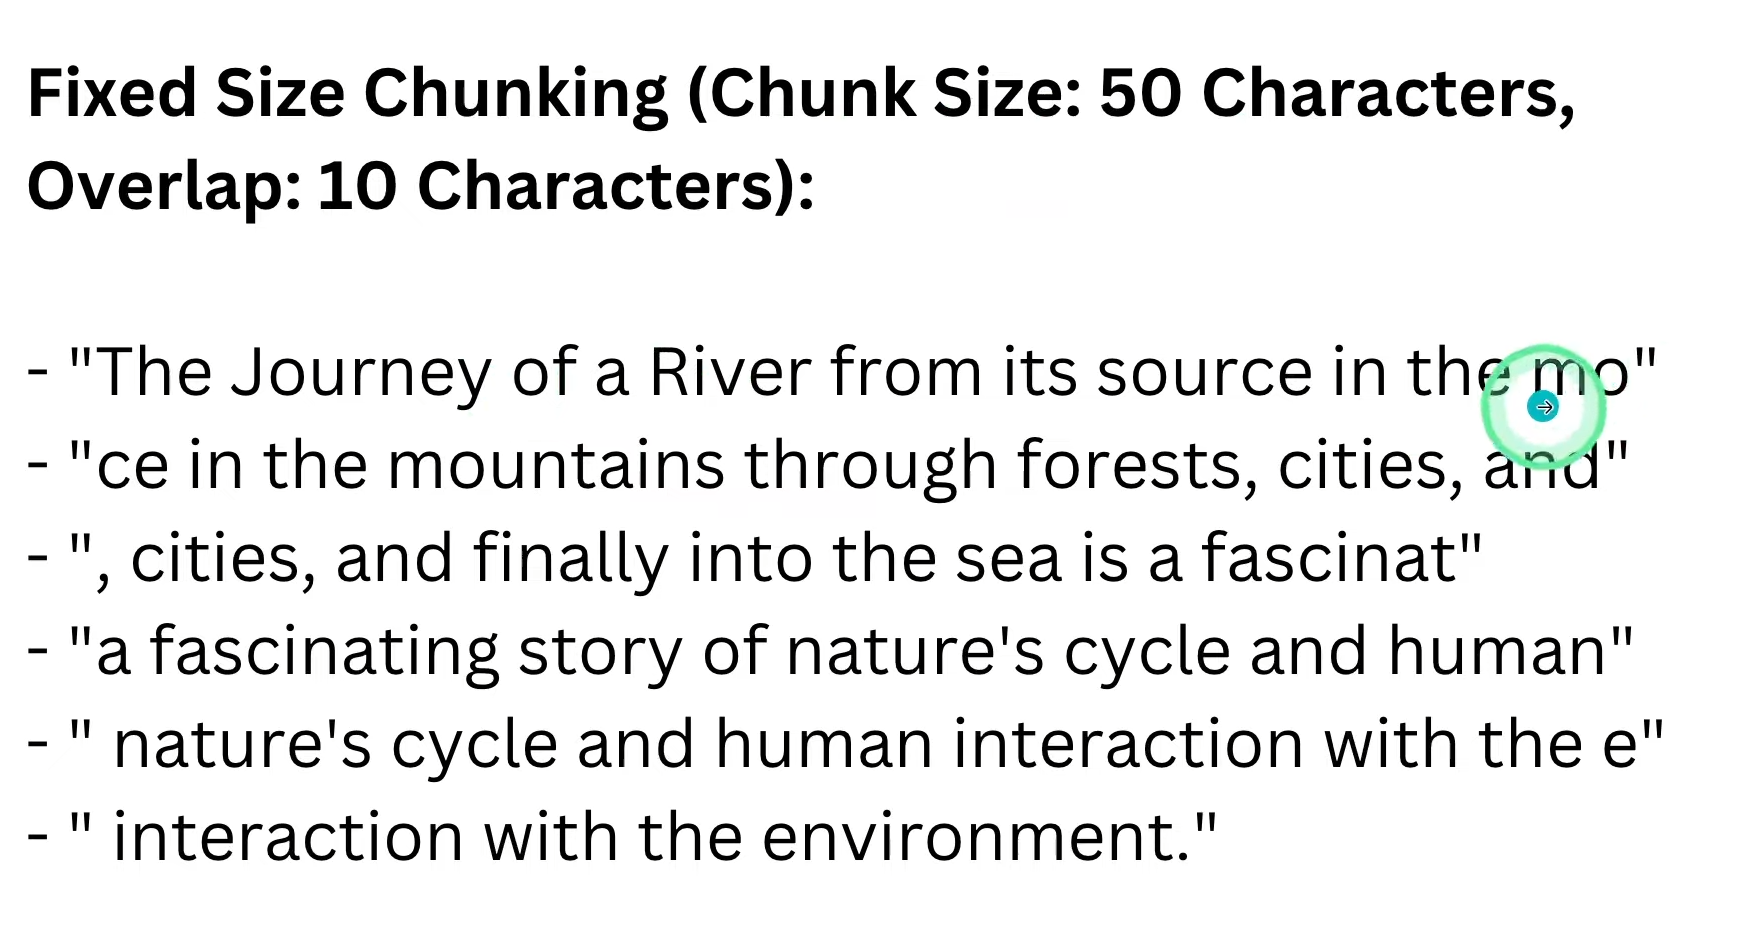

Fixed sized chunks produce irrelevent results

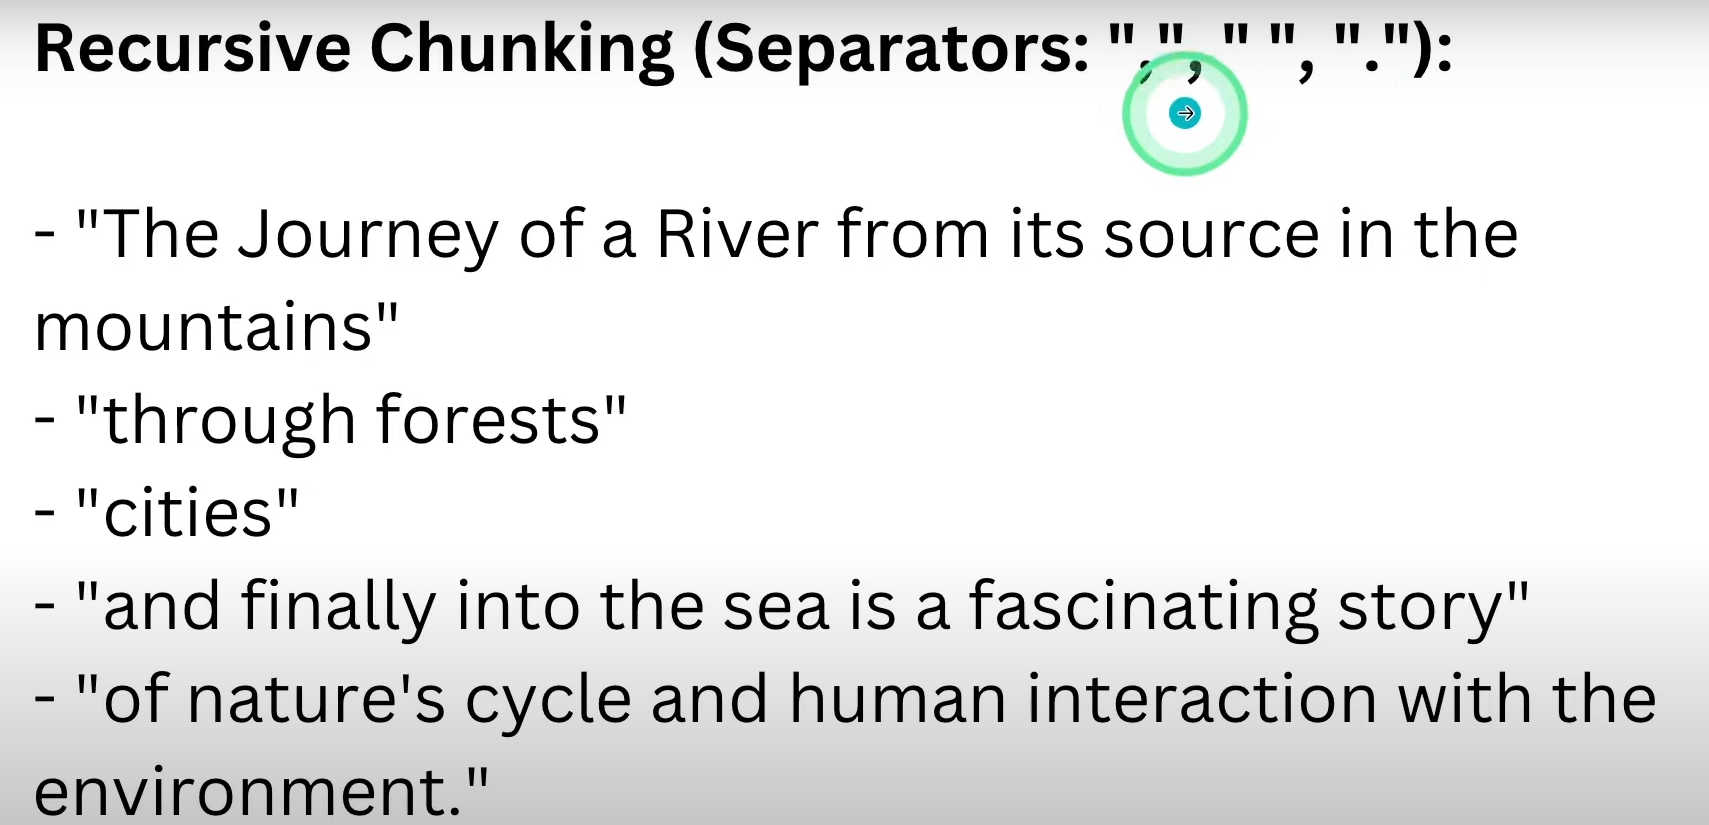

if we are dividing based on commas thats also don't going to help us

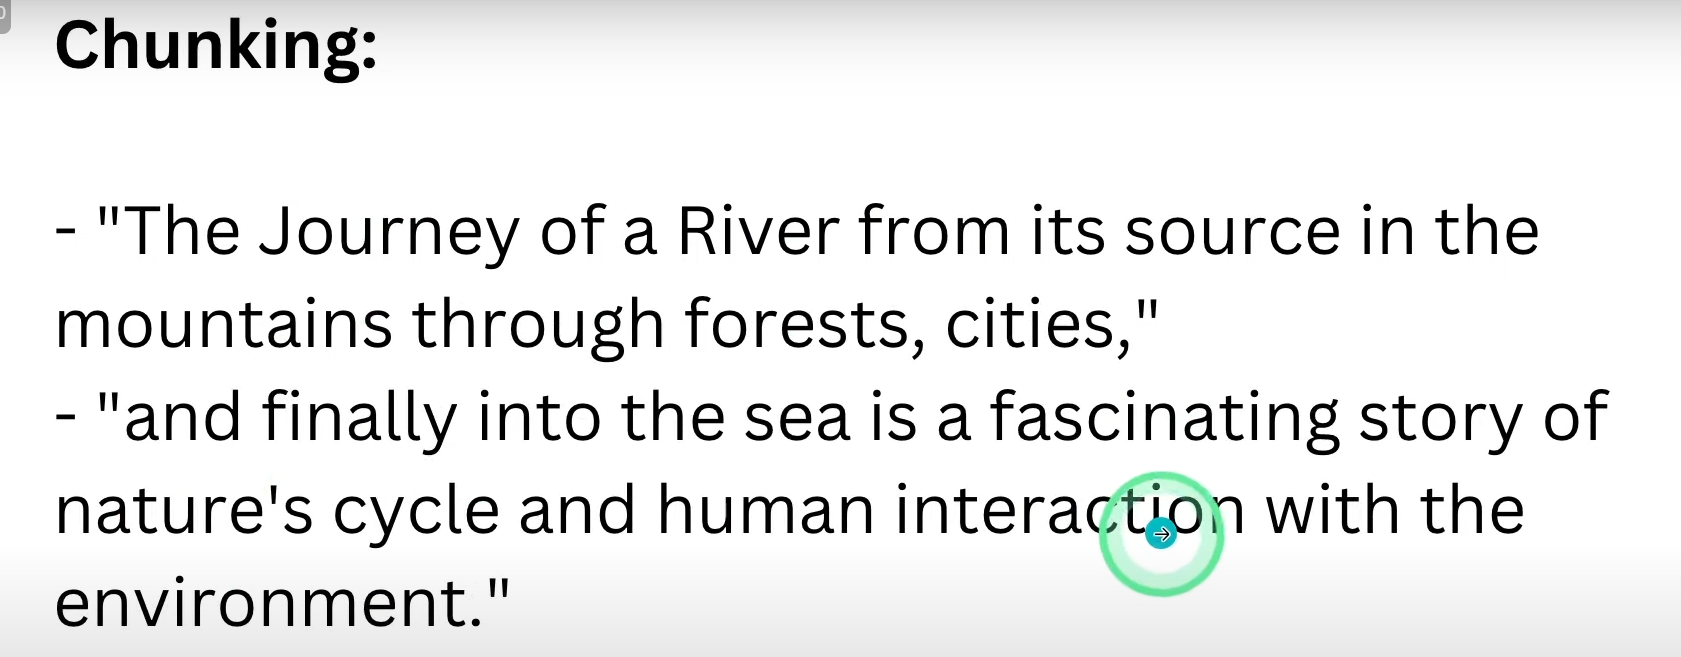

If we are dividing based on paragraph or fullstop, we migh miss subsequent paragraph if it is relaed

These all problems we are going to deal with chunking strategies

# Chunking Strategies

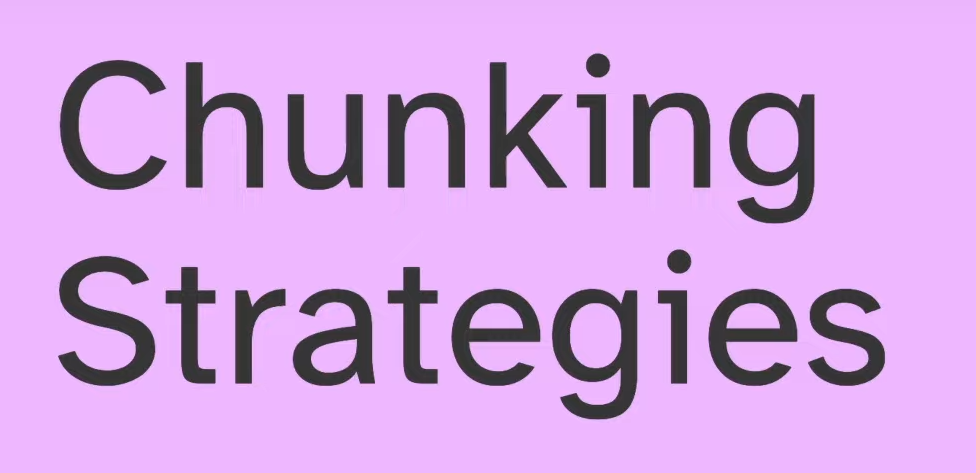
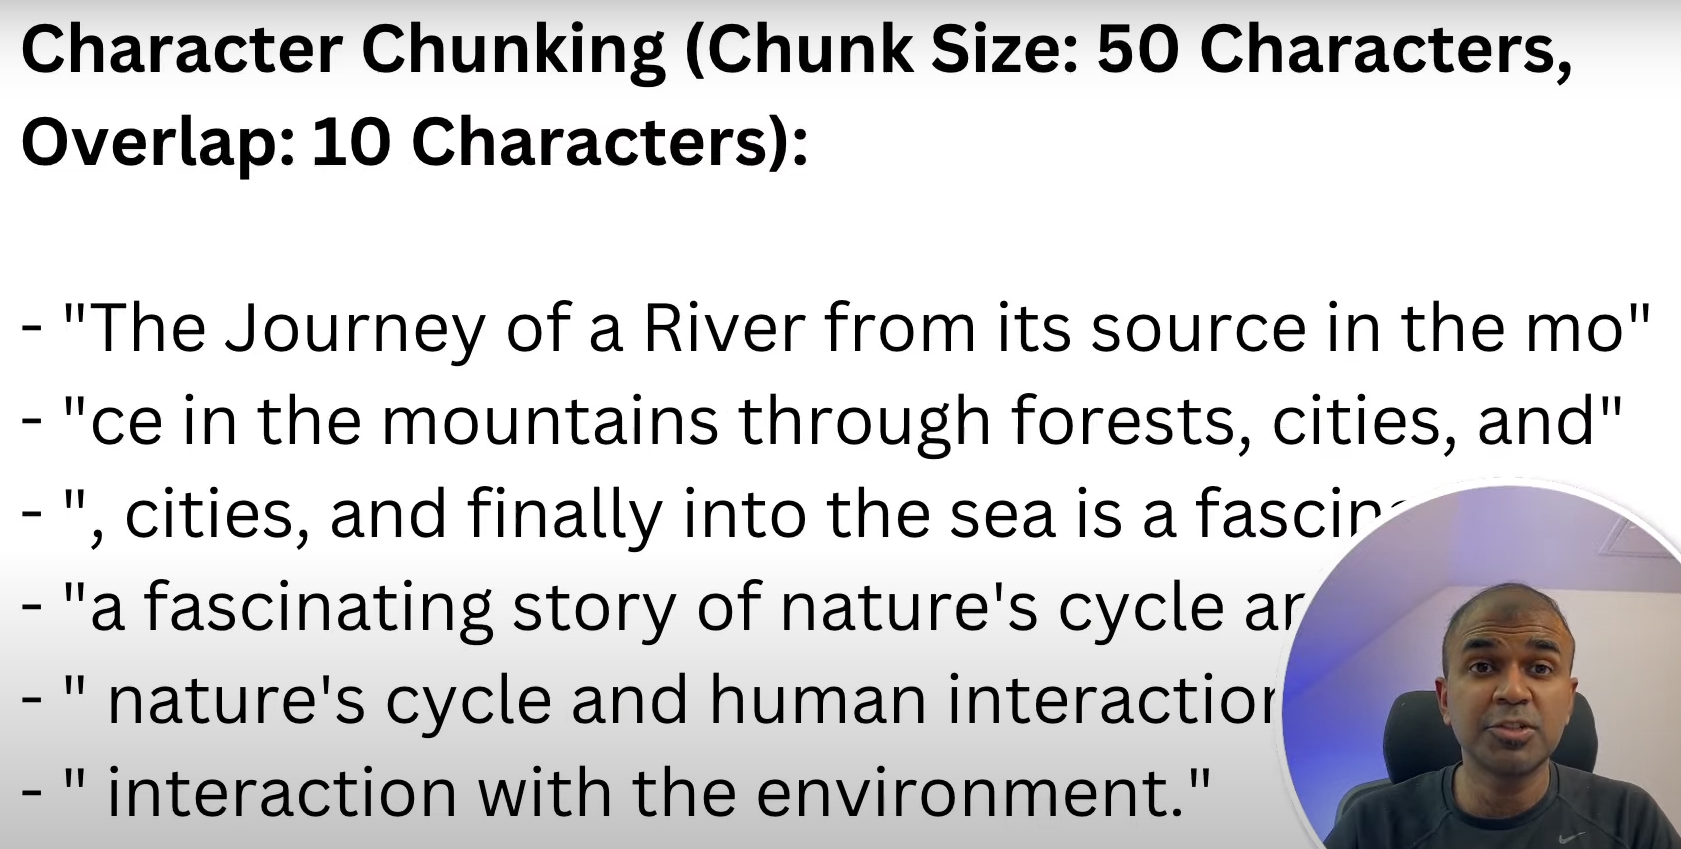
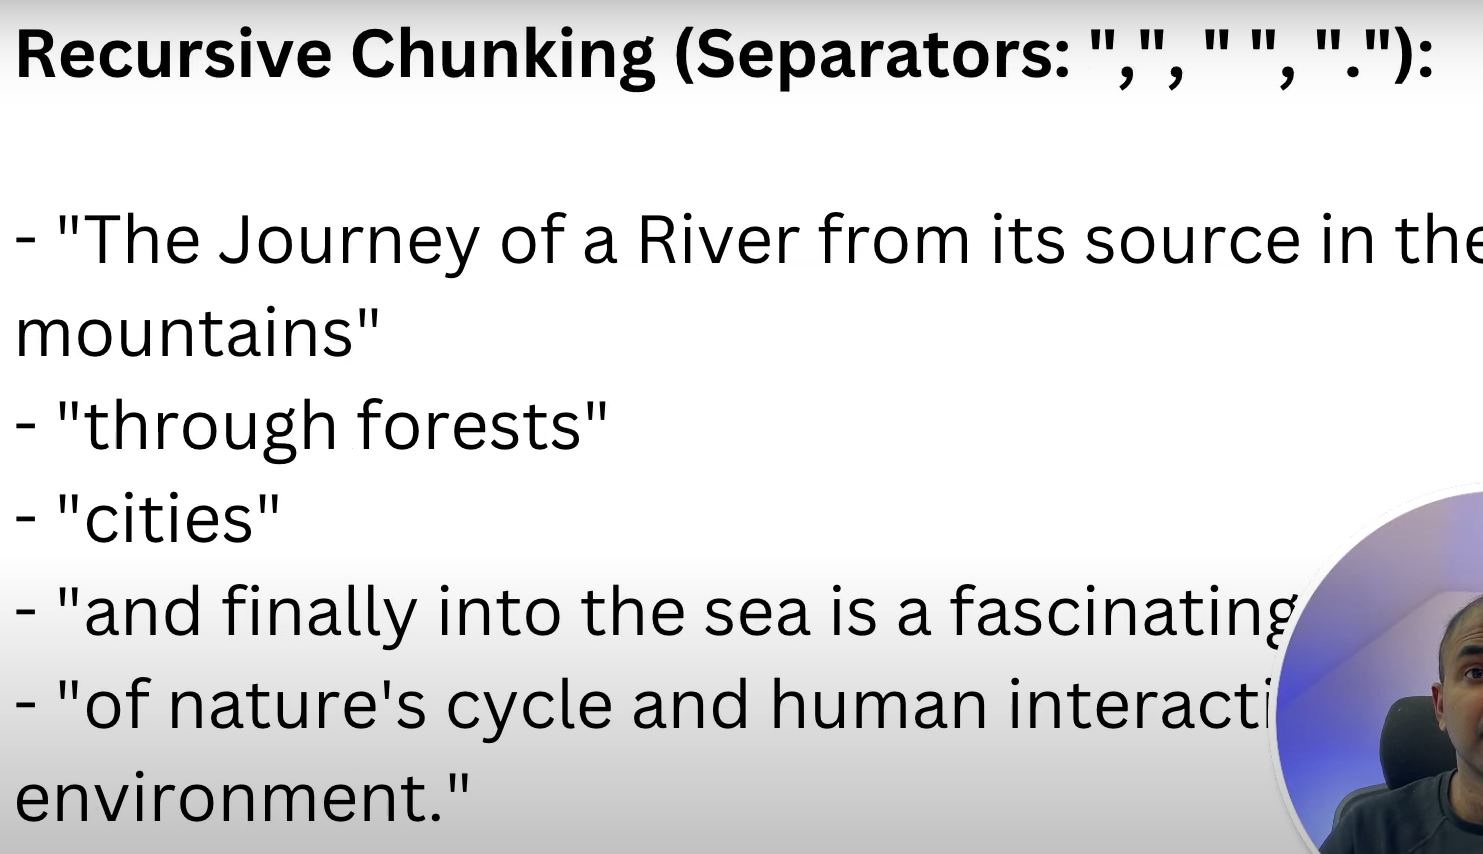
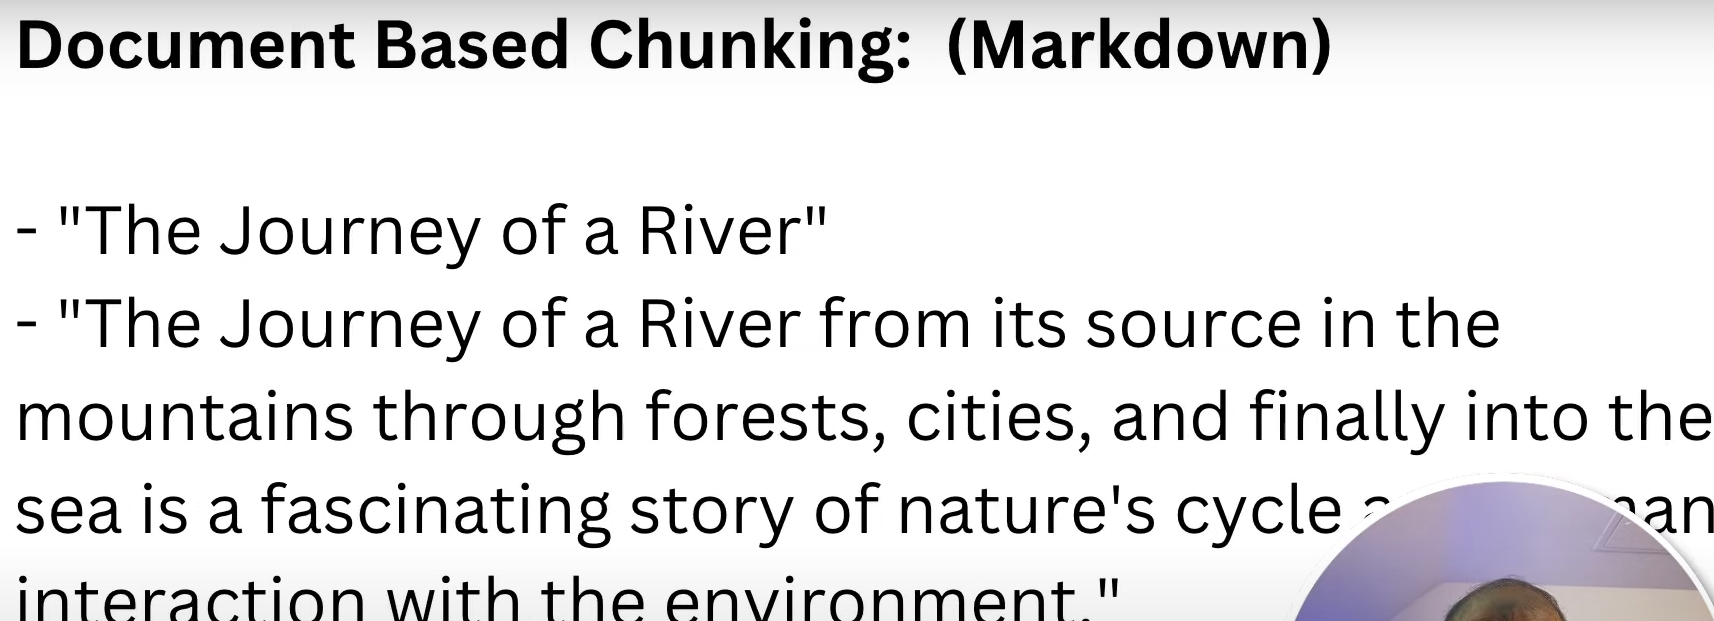
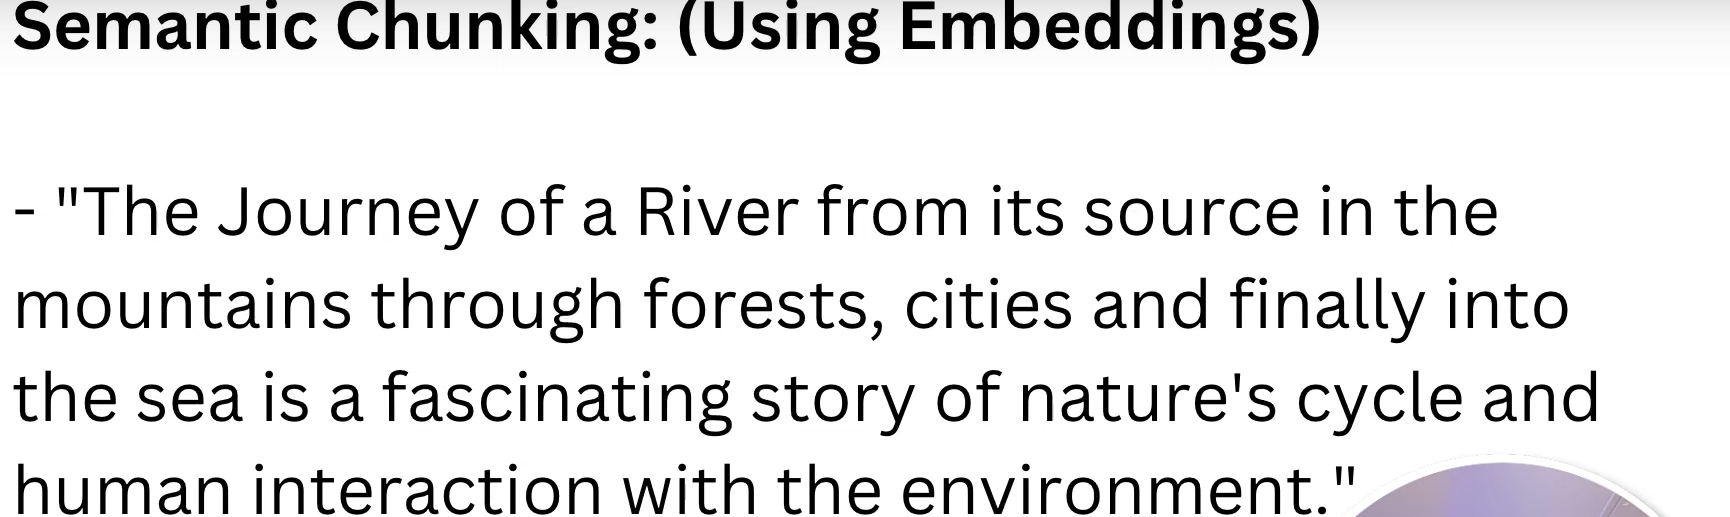
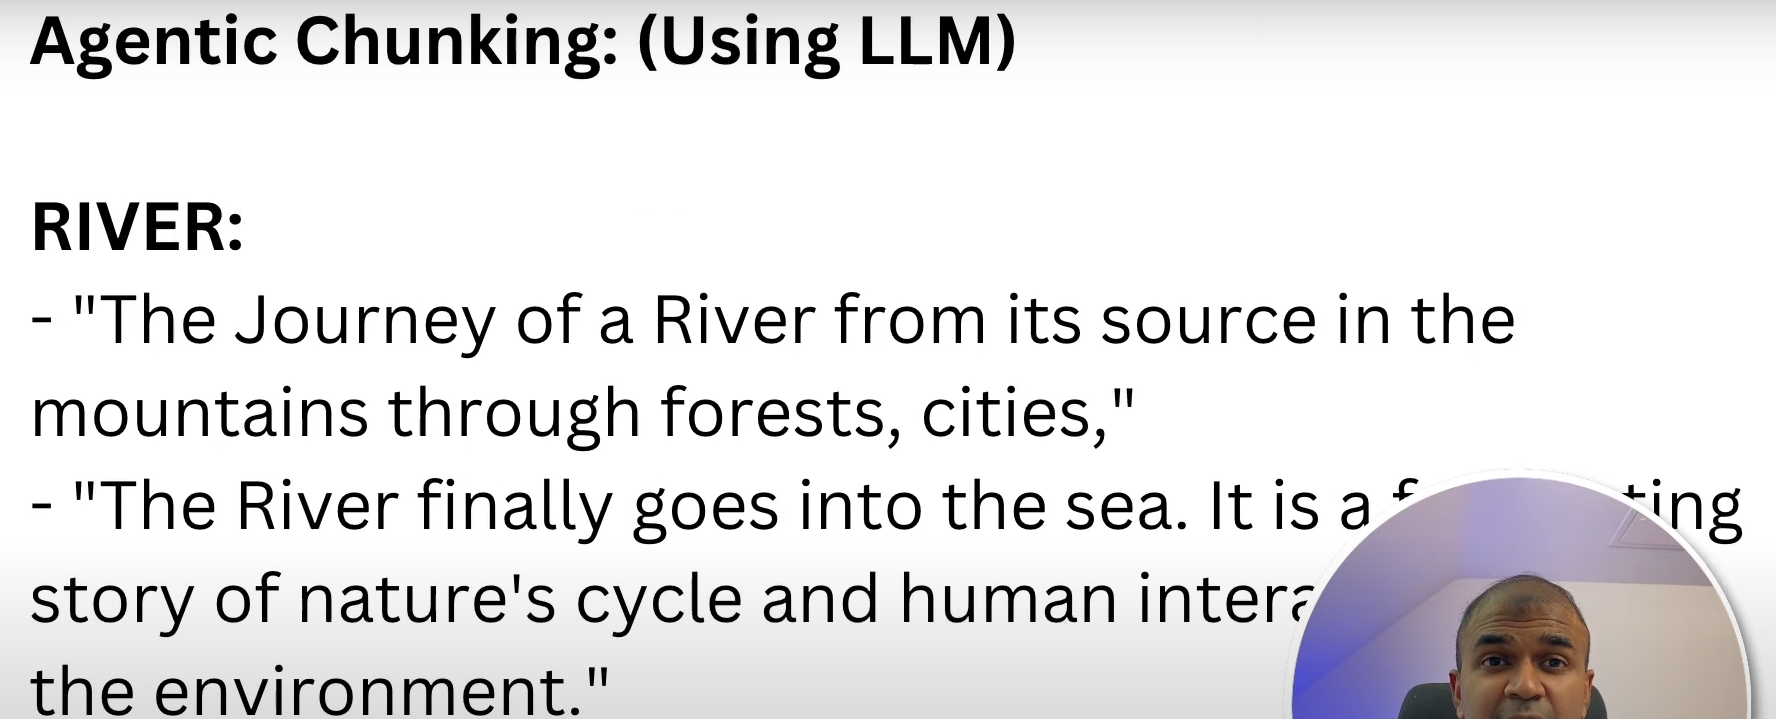


# Working

In [5]:
pip install -U chromadb langchain llama-index langchain_experimental langchain_openai

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install langchainhub rich

Note: you may need to restart the kernel to use updated packages.


In [7]:
from rich import print
from langchain.docstore.document import Document
from langchain_community.chat_models import ChatOllama
from langchain_community.vectorstores import Chroma
from langchain_community import embeddings
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [8]:
local_llm = ChatOllama(model="mistral")

# RAG
def rag(chunks, collection_name):
    vectorstore = Chroma.from_documents(
        documents=documents,
        collection_name=collection_name,
        embedding=embeddings.ollama.OllamaEmbeddings(model='nomic-embed-text'),
    )
    retriever = vectorstore.as_retriever()

    prompt_template = """Answer the question based only on the following context:
    {context}
    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(prompt_template)

    chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | local_llm
        | StrOutputParser()
    )
    result = chain.invoke("What is the use of Text Splitting?")
    print(result)


# 1. Character Text Splitting
print("#### Character Text Splitting ####")

text = "Text splitting in LangChain is a critical feature that facilitates the division of large texts into smaller, manageable segments. "

# Manual Splitting ( Based on no of characters here 35 character then split)
chunks = []
chunk_size = 35 # Characters
for i in range(0, len(text), chunk_size):
    chunk = text[i:i + chunk_size]
    chunks.append(chunk)
documents = [Document(page_content=chunk, metadata={"source": "local"}) for chunk in chunks]
print(documents)

C:\Users\abbas\AppData\Local\Temp\ipykernel_8212\614193831.py:1: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  local_llm = ChatOllama(model="mistral")


#### Character Text Splitting ####

[
    Document(metadata={'source': 'local'}, page_content='Text splitting in LangChain is a cr'),
    Document(metadata={'source': 'local'}, page_content='itical feature that facilitates the'),
    Document(metadata={'source': 'local'}, page_content=' division of large texts into small'),
    Document(metadata={'source': 'local'}, page_content='er, manageable segments. ')
]

In [9]:
# Automatic Text Splitting ( same as previous just using langchain)
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(chunk_size = 35, chunk_overlap=0, separator='', strip_whitespace=False)
documents = text_splitter.create_documents([text])
print(documents)

[
    Document(metadata={}, page_content='Text splitting in LangChain is a cr'),
    Document(metadata={}, page_content='itical feature that facilitates the'),
    Document(metadata={}, page_content=' division of large texts into small'),
    Document(metadata={}, page_content='er, manageable segments. ')
]

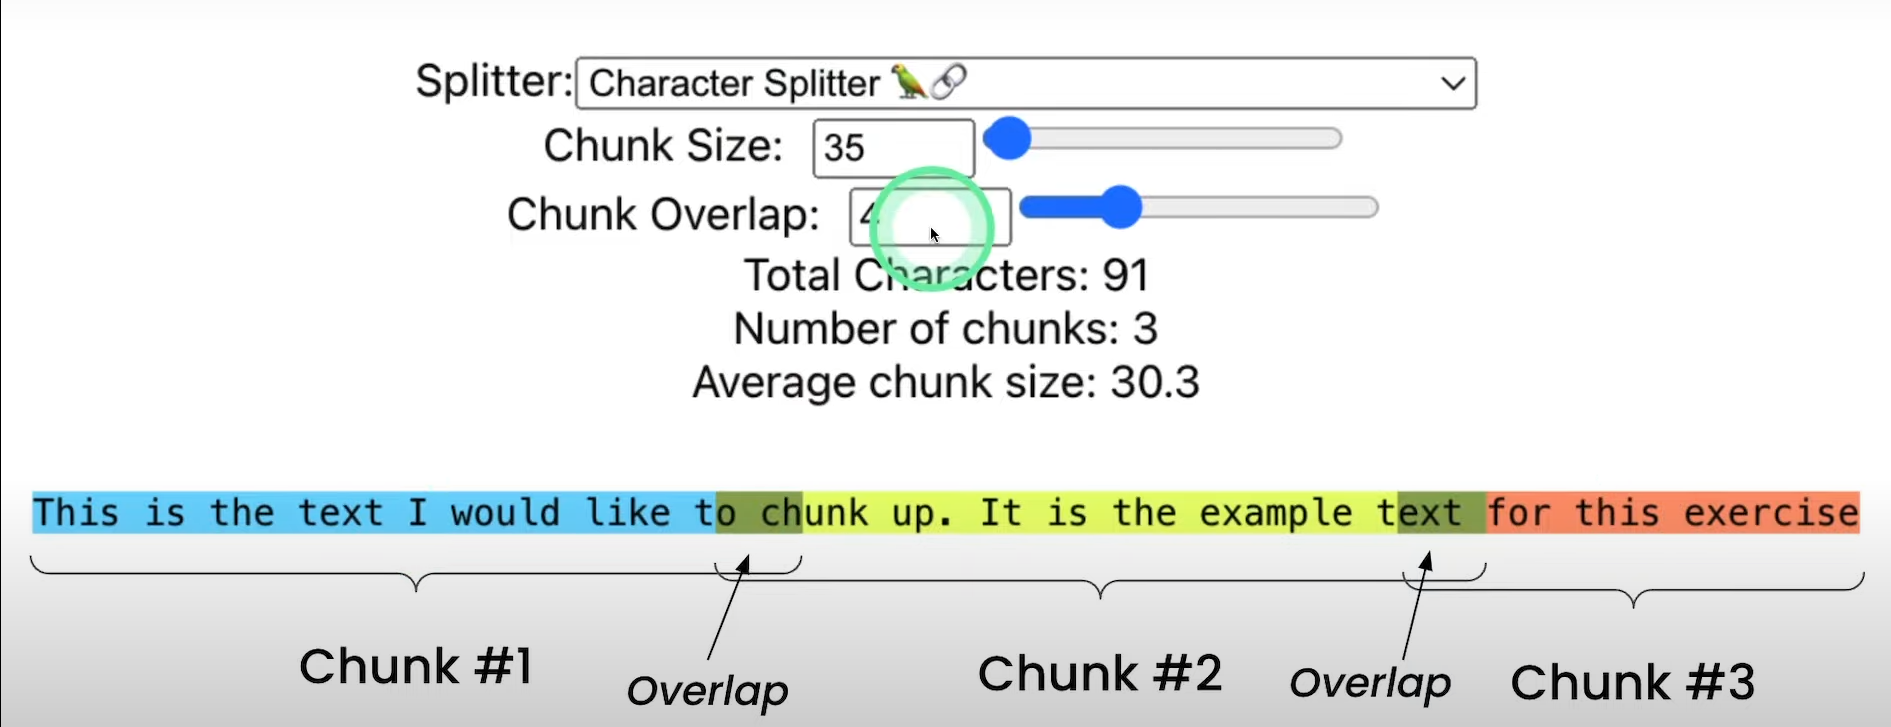

In [10]:
# 2. Recursive Character Text Splitting ( we will use a new line as a reference for splitting)
print("#### Recursive Character Text Splitting ####")

from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 65, chunk_overlap=0) # ["\n\n", "\n", " ", ""] 65,450
documents = text_splitter.create_documents([text])
print(documents) 

#### Recursive Character Text Splitting ####

[
    Document(metadata={}, page_content='Text splitting in LangChain is a critical feature that'),
    Document(metadata={}, page_content='facilitates the division of large texts into smaller, manageable'),
    Document(metadata={}, page_content='segments.')
]

In [11]:
# Suppose if i want to give more content on recursive character splitting 

# 2. Recursive Character Text Splitting with reading an file
print("#### Recursive Character Text Splitting ####")

from langchain.text_splitter import RecursiveCharacterTextSplitter
with open('content.txt', 'r', encoding='utf-8') as file:
    text = file.read()

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 65, chunk_overlap=0) # ["\n\n", "\n", " ", ""] 65,450
print(text_splitter.create_documents([text])) 

#### Recursive Character Text Splitting ####

[
    Document(metadata={}, page_content='Text splitting in LangChain is a critical feature that'),
    Document(metadata={}, page_content='facilitates the division of large texts into smaller, manageable'),
    Document(metadata={}, page_content='segments.'),
    Document(metadata={}, page_content='This capability is vital for improving comprehension and'),
    Document(metadata={}, page_content='processing efficiency, especially in tasks that require detailed'),
    Document(metadata={}, page_content='analysis or extraction of specific contexts.'),
    Document(metadata={}, page_content='ChatGPT, developed by OpenAI, represents a leap forward in'),
    Document(metadata={}, page_content='natural language processing technologies.'),
    Document(metadata={}, page_content="It's a conversational AI model capable of understanding and"),
    Document(metadata={}, page_content='generating human-like text, allowing for dynamic interactions'),
    Document(metadata={}, page_content='and providing responses that are remarkably coherent and'),
    Document(metadata={}, page_content='contextually relevant. ChatGPT has been integrated into a'),
    Document(metadata={}, page_content='multitude of applications, revolutionizing the way we interact'),
    Document(metadata={}, page_content='with machines and access information.'),
    Document(metadata={}, page_content='By leveraging LangChain for text splitting, users can'),
    Document(metadata={}, page_content='efficiently navigate and analyze vast amounts of text data,'),
    Document(metadata={}, page_content='facilitating a deeper understanding and more insightful'),
    Document(metadata={}, page_content='conclusions.')
]

In [12]:
# Now lets try to increase chunk size to 450
# from rich import print # ( for good looking output)
print("#### Recursive Character Text Splitting ####")

from langchain.text_splitter import RecursiveCharacterTextSplitter
with open('content.txt', 'r', encoding='utf-8') as file:
    text = file.read()

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 450, chunk_overlap=0) # ["\n\n", "\n", " ", ""] 65,450
print(text_splitter.create_documents([text])) 

#### Recursive Character Text Splitting ####

[
    Document(
        metadata={},
        page_content='Text splitting in LangChain is a critical feature that facilitates the division of large 
texts into smaller, manageable segments. \nThis capability is vital for improving comprehension and processing 
efficiency, especially in tasks that require detailed analysis or extraction of specific contexts.'
    ),
    Document(
        metadata={},
        page_content="ChatGPT, developed by OpenAI, represents a leap forward in natural language processing 
technologies.\nIt's a conversational AI model capable of understanding and generating human-like text, allowing for
dynamic interactions and providing responses that are remarkably coherent and contextually relevant. ChatGPT has 
been integrated into a multitude of applications, revolutionizing the way we interact with machines and access 
information."
    ),
    Document(
        metadata={},
        page_content='By leveraging LangChain for text splitting, users can efficiently navigate and analyze vast 
amounts of text data, facilitating a deeper understanding and more insightful conclusions.'
    )
]

In [13]:
# 3. Document Specific Splitting
print("#### Document Specific Splitting ####")

# Document Specific Splitting - Markdown
from langchain.text_splitter import MarkdownTextSplitter
splitter = MarkdownTextSplitter(chunk_size = 40, chunk_overlap=0)
markdown_text = """
# Fun in California

## Driving

Try driving on the 1 down to San Diego

### Food

Make sure to eat a burrito while you're there

## Hiking

Go to Yosemite
"""
print(splitter.create_documents([markdown_text]))

#### Document Specific Splitting ####

[
    Document(metadata={}, page_content='# Fun in California\n\n## Driving'),
    Document(metadata={}, page_content='Try driving on the 1 down to San Diego'),
    Document(metadata={}, page_content='### Food'),
    Document(metadata={}, page_content="Make sure to eat a burrito while you're"),
    Document(metadata={}, page_content='there'),
    Document(metadata={}, page_content='## Hiking\n\nGo to Yosemite')
]

In [14]:
# Document Specific Splitting - Python
from langchain.text_splitter import PythonCodeTextSplitter
python_text = """
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

p1 = Person("John", 36)

for i in range(10):
    print (i)
"""
python_splitter = PythonCodeTextSplitter(chunk_size=100, chunk_overlap=0)
print(python_splitter.create_documents([python_text]))

[
    Document(
        metadata={},
        page_content='class Person:\n  def __init__(self, name, age):\n    self.name = name\n    self.age = age'
    ),
    Document(metadata={}, page_content='p1 = Person("John", 36)\n\nfor i in range(10):\n    print (i)')
]

In [15]:
# Document Specific Splitting - Javascript
from langchain.text_splitter import RecursiveCharacterTextSplitter, Language
javascript_text = """
// Function is called, the return value will end up in x
let x = myFunction(4, 3);

function myFunction(a, b) {
// Function returns the product of a and b
  return a * b;
}
"""
js_splitter = RecursiveCharacterTextSplitter.from_language(
    language=Language.JS, chunk_size=65, chunk_overlap=0
)
print(js_splitter.create_documents([javascript_text]))

[
    Document(metadata={}, page_content='// Function is called, the return value will end up in x'),
    Document(metadata={}, page_content='let x = myFunction(4, 3);'),
    Document(metadata={}, page_content='function myFunction(a, b) {'),
    Document(metadata={}, page_content='// Function returns the product of a and b\n  return a * b;\n}')
]

<p style="font-size: 14px"><span style="color: yellow">To improve this we are using semantic chunking</span></p>

In [34]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("OPEN_AI_KEY")

In [38]:
import os

# Set your OpenAI API key here
os.environ["OPENAI_API_KEY"] = api_key # Replace with your actual OpenAI API key

# 4. Semantic Chunking
print("#### Semantic Chunking ####")

from langchain_experimental.text_splitter import SemanticChunker

# Use HuggingFaceEmbeddings to avoid OpenAI API quota issues
text_splitter = SemanticChunker(HuggingFaceEmbeddings())
text_splitter = SemanticChunker(
    HuggingFaceEmbeddings(), breakpoint_threshold_type="percentile" # "standard_deviation", "interquartile"
)
documents = text_splitter.create_documents([text])
print(documents)

#### Semantic Chunking ####

C:\Users\abbas\AppData\Local\Temp\ipykernel_8212\3491040921.py:12: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  text_splitter = SemanticChunker(HuggingFaceEmbeddings())
C:\Users\abbas\AppData\Local\Temp\ipykernel_8212\3491040921.py:14: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  HuggingFaceEmbeddings(), breakpoint_threshold_type="percentile" # "standard_deviation", "interquartile"


[
    Document(
        metadata={},
        page_content='Text splitting in LangChain is a critical feature that facilitates the division of large 
texts into smaller, manageable segments. This capability is vital for improving comprehension and processing 
efficiency, especially in tasks that require detailed analysis or extraction of specific contexts.'
    ),
    Document(
        metadata={},
        page_content="ChatGPT, developed by OpenAI, represents a leap forward in natural language processing 
technologies. It's a conversational AI model capable of understanding and generating human-like text, allowing for 
dynamic interactions and providing responses that are remarkably coherent and contextually relevant. ChatGPT has 
been integrated into a multitude of applications, revolutionizing the way we interact with machines and access 
information. By leveraging LangChain for text splitting, users can efficiently navigate and analyze vast amounts of
text data, facilitating a deeper understanding and more insightful conclusions."
    )
]

previously we use embedding for sematic chunking, in agentic chunking we are using LLM

In [46]:
# 5. Agentic Chunking
print("#### Proposition-Based Chunking ####")

# https://arxiv.org/pdf/2312.06648.pdf

from langchain.output_parsers.openai_tools import JsonOutputToolsParser
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnableLambda
from langchain.chains import create_extraction_chain
from typing import Optional, List
from langchain.chains import create_extraction_chain_pydantic
from langchain_core.pydantic_v1 import BaseModel
from langchain import hub

obj = hub.pull("wfh/proposal-indexing")
llm = ChatOpenAI(model='gpt-3.5-turbo')
runnable = obj | llm

class Sentences(BaseModel):
    sentences: List[str]
    
# Extraction
extraction_chain = create_extraction_chain_pydantic(pydantic_schema=Sentences, llm=llm)
def get_propositions(text):
    runnable_output = runnable.invoke({
    	"input": text
    }).content
    propositions = extraction_chain.invoke(runnable_output)["text"][0].sentences
    return propositions
    
paragraphs = text.split("\n\n")
text_propositions = []
for i, para in enumerate(paragraphs[:5]):
    propositions = get_propositions(para)
    text_propositions.extend(propositions)
    print (f"Done with {i}")

print (f"You have {len(text_propositions)} propositions")
print(text_propositions[:10])

print("#### Agentic Chunking ####")

from agentic_chunker import AgenticChunker
ac = AgenticChunker()
ac.add_propositions(text_propositions)
print(ac.pretty_print_chunks())
chunks = ac.get_chunks(get_type='list_of_strings')
print(chunks)
documents = [Document(page_content=chunk, metadata={"source": "local"}) for chunk in chunks]
rag(documents, "agentic-chunks")

#### Proposition-Based Chunking ####

d:\# My Learning\Coding\Summer-Internship\.venv\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(
d:\# My Learning\Coding\Summer-Internship\.venv\Lib\site-packages\pydantic\_internal\_generate_schema.py:913: UserWarning: Mixing V1 models and V2 models (or constructs, like `TypeAdapter`) is not supported. Please upgrade `Sentences` to V2.
  warn(


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

Agentic Chunker

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
import uuid
from langchain_openai import ChatOpenAI
import os
from typing import Optional
from langchain_core.pydantic_v1 import BaseModel
from langchain.chains import create_extraction_chain_pydantic
from dotenv import load_dotenv
from rich import print

load_dotenv()

class AgenticChunker:
    def __init__(self, openai_api_key=None):
        self.chunks = {}
        self.id_truncate_limit = 5

        # Whether or not to update/refine summaries and titles as you get new information
        self.generate_new_metadata_ind = True
        self.print_logging = True

        if openai_api_key is None:
            openai_api_key = os.getenv("OPENAI_API_KEY")

        if openai_api_key is None:
            raise ValueError("API key is not provided and not found in environment variables")

        self.llm = ChatOpenAI(model='gpt-3.5-turbo', openai_api_key=openai_api_key, temperature=0)

    def add_propositions(self, propositions):
        for proposition in propositions:
            self.add_proposition(proposition)
    
    def add_proposition(self, proposition):
        if self.print_logging:
            print (f"\nAdding: '{proposition}'")

        # If it's your first chunk, just make a new chunk and don't check for others
        if len(self.chunks) == 0:
            if self.print_logging:
                print ("No chunks, creating a new one")
            self._create_new_chunk(proposition)
            return

        chunk_id = self._find_relevant_chunk(proposition)

        # If a chunk was found then add the proposition to it
        if chunk_id:
            if self.print_logging:
                print (f"Chunk Found ({self.chunks[chunk_id]['chunk_id']}), adding to: {self.chunks[chunk_id]['title']}")
            self.add_proposition_to_chunk(chunk_id, proposition)
            return
        else:
            if self.print_logging:
                print ("No chunks found")
            # If a chunk wasn't found, then create a new one
            self._create_new_chunk(proposition)
        

    def add_proposition_to_chunk(self, chunk_id, proposition):
        # Add then
        self.chunks[chunk_id]['propositions'].append(proposition)

        # Then grab a new summary
        if self.generate_new_metadata_ind:
            self.chunks[chunk_id]['summary'] = self._update_chunk_summary(self.chunks[chunk_id])
            self.chunks[chunk_id]['title'] = self._update_chunk_title(self.chunks[chunk_id])

    def _update_chunk_summary(self, chunk):
        """
        If you add a new proposition to a chunk, you may want to update the summary or else they could get stale
        """
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    A new proposition was just added to one of your chunks, you should generate a very brief 1-sentence summary which will inform viewers what a chunk group is about.

                    A good summary will say what the chunk is about, and give any clarifying instructions on what to add to the chunk.

                    You will be given a group of propositions which are in the chunk and the chunks current summary.

                    Your summaries should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Proposition: Greg likes to eat pizza
                    Output: This chunk contains information about the types of food Greg likes to eat.

                    Only respond with the chunk new summary, nothing else.
                    """,
                ),
                ("user", "Chunk's propositions:\n{proposition}\n\nCurrent chunk summary:\n{current_summary}"),
            ]
        )

        runnable = PROMPT | self.llm

        new_chunk_summary = runnable.invoke({
            "proposition": "\n".join(chunk['propositions']),
            "current_summary" : chunk['summary']
        }).content

        return new_chunk_summary
    
    def _update_chunk_title(self, chunk):
        """
        If you add a new proposition to a chunk, you may want to update the title or else it can get stale
        """
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    A new proposition was just added to one of your chunks, you should generate a very brief updated chunk title which will inform viewers what a chunk group is about.

                    A good title will say what the chunk is about.

                    You will be given a group of propositions which are in the chunk, chunk summary and the chunk title.

                    Your title should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Summary: This chunk is about dates and times that the author talks about
                    Output: Date & Times

                    Only respond with the new chunk title, nothing else.
                    """,
                ),
                ("user", "Chunk's propositions:\n{proposition}\n\nChunk summary:\n{current_summary}\n\nCurrent chunk title:\n{current_title}"),
            ]
        )

        runnable = PROMPT | self.llm

        updated_chunk_title = runnable.invoke({
            "proposition": "\n".join(chunk['propositions']),
            "current_summary" : chunk['summary'],
            "current_title" : chunk['title']
        }).content

        return updated_chunk_title

    def _get_new_chunk_summary(self, proposition):
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    You should generate a very brief 1-sentence summary which will inform viewers what a chunk group is about.

                    A good summary will say what the chunk is about, and give any clarifying instructions on what to add to the chunk.

                    You will be given a proposition which will go into a new chunk. This new chunk needs a summary.

                    Your summaries should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Proposition: Greg likes to eat pizza
                    Output: This chunk contains information about the types of food Greg likes to eat.

                    Only respond with the new chunk summary, nothing else.
                    """,
                ),
                ("user", "Determine the summary of the new chunk that this proposition will go into:\n{proposition}"),
            ]
        )

        runnable = PROMPT | self.llm

        new_chunk_summary = runnable.invoke({
            "proposition": proposition
        }).content

        return new_chunk_summary
    
    def _get_new_chunk_title(self, summary):
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    You should generate a very brief few word chunk title which will inform viewers what a chunk group is about.

                    A good chunk title is brief but encompasses what the chunk is about

                    You will be given a summary of a chunk which needs a title

                    Your titles should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Summary: This chunk is about dates and times that the author talks about
                    Output: Date & Times

                    Only respond with the new chunk title, nothing else.
                    """,
                ),
                ("user", "Determine the title of the chunk that this summary belongs to:\n{summary}"),
            ]
        )

        runnable = PROMPT | self.llm

        new_chunk_title = runnable.invoke({
            "summary": summary
        }).content

        return new_chunk_title


    def _create_new_chunk(self, proposition):
        new_chunk_id = str(uuid.uuid4())[:self.id_truncate_limit] # I don't want long ids
        new_chunk_summary = self._get_new_chunk_summary(proposition)
        new_chunk_title = self._get_new_chunk_title(new_chunk_summary)

        self.chunks[new_chunk_id] = {
            'chunk_id' : new_chunk_id,
            'propositions': [proposition],
            'title' : new_chunk_title,
            'summary': new_chunk_summary,
            'chunk_index' : len(self.chunks)
        }
        if self.print_logging:
            print (f"Created new chunk ({new_chunk_id}): {new_chunk_title}")
    
    def get_chunk_outline(self):
        """
        Get a string which represents the chunks you currently have.
        This will be empty when you first start off
        """
        chunk_outline = ""

        for chunk_id, chunk in self.chunks.items():
            single_chunk_string = f"""Chunk ({chunk['chunk_id']}): {chunk['title']}\nSummary: {chunk['summary']}\n\n"""
        
            chunk_outline += single_chunk_string
        
        return chunk_outline

    def _find_relevant_chunk(self, proposition):
        current_chunk_outline = self.get_chunk_outline()

        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    Determine whether or not the "Proposition" should belong to any of the existing chunks.

                    A proposition should belong to a chunk of their meaning, direction, or intention are similar.
                    The goal is to group similar propositions and chunks.

                    If you think a proposition should be joined with a chunk, return the chunk id.
                    If you do not think an item should be joined with an existing chunk, just return "No chunks"

                    Example:
                    Input:
                        - Proposition: "Greg really likes hamburgers"
                        - Current Chunks:
                            - Chunk ID: 2n4l3d
                            - Chunk Name: Places in San Francisco
                            - Chunk Summary: Overview of the things to do with San Francisco Places

                            - Chunk ID: 93833k
                            - Chunk Name: Food Greg likes
                            - Chunk Summary: Lists of the food and dishes that Greg likes
                    Output: 93833k
                    """,
                ),
                ("user", "Current Chunks:\n--Start of current chunks--\n{current_chunk_outline}\n--End of current chunks--"),
                ("user", "Determine if the following statement should belong to one of the chunks outlined:\n{proposition}"),
            ]
        )

        runnable = PROMPT | self.llm

        chunk_found = runnable.invoke({
            "proposition": proposition,
            "current_chunk_outline": current_chunk_outline
        }).content

        # Pydantic data class
        class ChunkID(BaseModel):
            """Extracting the chunk id"""
            chunk_id: Optional[str]
            
        # Extraction to catch-all LLM responses. This is a bandaid
        extraction_chain = create_extraction_chain_pydantic(pydantic_schema=ChunkID, llm=self.llm)
        extraction_found = extraction_chain.invoke(chunk_found)["text"]
        if extraction_found:
            chunk_found = extraction_found[0].chunk_id

        # If you got a response that isn't the chunk id limit, chances are it's a bad response or it found nothing
        # So return nothing
        if len(chunk_found) != self.id_truncate_limit:
            return None

        return chunk_found
    
    def get_chunks(self, get_type='dict'):
        """
        This function returns the chunks in the format specified by the 'get_type' parameter.
        If 'get_type' is 'dict', it returns the chunks as a dictionary.
        If 'get_type' is 'list_of_strings', it returns the chunks as a list of strings, where each string is a proposition in the chunk.
        """
        if get_type == 'dict':
            return self.chunks
        if get_type == 'list_of_strings':
            chunks = []
            for chunk_id, chunk in self.chunks.items():
                chunks.append(" ".join([x for x in chunk['propositions']]))
            return chunks
    
    def pretty_print_chunks(self):
        print (f"\nYou have {len(self.chunks)} chunks\n")
        for chunk_id, chunk in self.chunks.items():
            print(f"Chunk #{chunk['chunk_index']}")
            print(f"Chunk ID: {chunk_id}")
            print(f"Summary: {chunk['summary']}")
            print(f"Propositions:")
            for prop in chunk['propositions']:
                print(f"    -{prop}")
            print("\n\n")

    def pretty_print_chunk_outline(self):
        print ("Chunk Outline\n")
        print(self.get_chunk_outline())

if __name__ == "__main__":
    ac = AgenticChunker()

    ## Comment and uncomment the propositions to your hearts content
    propositions = [
        'The month is October.',
        'The year is 2023.',
        "One of the most important things that I didn't understand about the world as a child was the degree to which the returns for performance are superlinear.",
        'Teachers and coaches implicitly told us that the returns were linear.',
        "I heard a thousand times that 'You get out what you put in.'",
        # 'Teachers and coaches meant well.',
        # "The statement that 'You get out what you put in' is rarely true.",
        # "If your product is only half as good as your competitor's product, you do not get half as many customers.",
        # "You get no customers if your product is only half as good as your competitor's product.",
        # 'You go out of business if you get no customers.',
        # 'The returns for performance are superlinear in business.',
        # 'Some people think the superlinear returns for performance are a flaw of capitalism.',
        # 'Some people think that changing the rules of capitalism would stop the superlinear returns for performance from being true.',
        # 'Superlinear returns for performance are a feature of the world.',
        # 'Superlinear returns for performance are not an artifact of rules that humans have invented.',
        # 'The same pattern of superlinear returns is observed in fame.',
        # 'The same pattern of superlinear returns is observed in power.',
        # 'The same pattern of superlinear returns is observed in military victories.',
        # 'The same pattern of superlinear returns is observed in knowledge.',
        # 'The same pattern of superlinear returns is observed in benefit to humanity.',
        # 'In fame, power, military victories, knowledge, and benefit to humanity, the rich get richer.'
    ]
    
    ac.add_propositions(propositions)
    ac.pretty_print_chunks()
    ac.pretty_print_chunk_outline()
    print (ac.get_chunks(get_type='list_of_strings'))

Adding: 'The month is October.'

No chunks, creating a new one

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}